collab
Could not find it w/e


<Figure size 432x288 with 0 Axes>

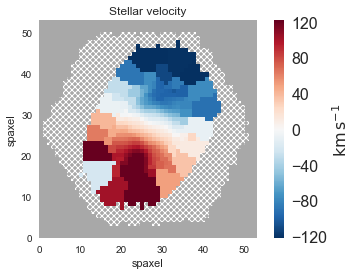

In [244]:
#Step 1: Go to Marvin Github and import some tutorial stuff
from marvin.tools.maps import Maps
import matplotlib.pyplot as plt
import numpy as np
import marvin
from marvin import config, marvindb
%matplotlib inline
config.access = 'collab'
# switch to an MPL
config.setRelease('DR15')
print(config.access)

#config.login()
#print(config.token)

plateids = ['8459-12701']

try:
    maps = [Maps(plateid) for plateid in plateids]
except: 
    print('Could not find it w/e')
#print(Maps('7443-12703').datamodel)
bin_ids = [mapz.get_binid() for mapz in maps]
svel_maps = [mapz['stellar_vel'] for mapz in maps]#emline_gvel
svel_map = svel_maps[0]

plt.clf()
fig, ax = svel_map.plot()
plt.show()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


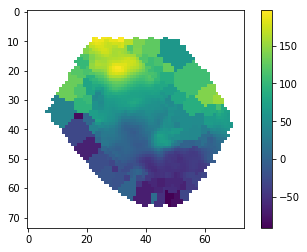

In [94]:
print(svel_map.value)

plt.clf()
plt.imshow(np.ma.masked_where(svel_map.value==0, svel_map.value))
plt.colorbar()
plt.show()

In [95]:
#Open drpall to get all ids
#this is useful: https://sdss-marvin.readthedocs.io/en/stable/tools/catalogues.html#dapall
import pyfits
drpall = pyfits.open('drpall-v2_4_3.fits')#apparently, this is DR15?

all_plateifus = drpall[1].data['PLATEIFU']

#Create a randomized list of plateifus
print(len(all_plateifus))

import random
sampling = random.sample(list(all_plateifus), k=100)
print("sampling with choices", sampling)
#these are somehow not all in DR15 not sure what is going on

11465
sampling with choices ['9292-6103', '8083-6102', '8104-3702', '9883-6102', '9540-3701', '9084-12704', '8604-3701', '8943-12705', '8325-9101', '8997-12701', '9129-12701', '8774-6102', '8702-12701', '8687-6103', '9508-9102', '8893-1901', '8920-12705', '8678-9101', '8996-1901', '9295-12703', '8692-6102', '9018-9101', '9509-9102', '8708-3704', '8936-12701', '8630-9102', '8111-6104', '8250-1901', '8883-6103', '9530-3701', '9680-3701', '8801-12705', '8333-12705', '8452-6103', '8997-9101', '9976-9101', '8322-9101', '8448-12702', '10009-9102', '9071-6104', '8143-12704', '7964-12702', '9692-6101', '9869-12702', '9013-3703', '8668-6101', '9035-6103', '8706-12701', '8442-9102', '8926-12705', '9777-1902', '7443-1901', '8446-12701', '8453-9101', '8035-9102', '8668-12703', '8138-12705', '8155-9101', '9010-3702', '8557-3701', '7995-12704', '8122-1901', '8624-12704', '9730-12702', '8100-9101', '8338-12701', '8440-3703', '8655-9102', '8917-3703', '7998-3704', '9067-6103', '8711-9102', '8581-12703

/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: ResourceWarning: unclosed file <_io.FileIO name='drpall-v2_4_3.fits' mode='rb' closefd=True>


In [230]:
#something is mismatched
from marvin.tools.query import Query

# search for galaxies with an NSA redshift < 0.1
# this is a really helpful page on how to design a good filter - 
# https://sdss-marvin.readthedocs.io/en/stable/tutorials/query-examples.html#marvin-query-examples
myfilter = 'nsa.z < 0.1 and ifu.name = 127*'
# this is an elegant way to get all of the same size of cubes

# create a query
query = Query(search_filter=myfilter, limit=1000)
# can make a filter to select a certain subset of galaxies
# you can also set the limit

results = query.run()

print(results)

print(results.count)

plateifu_list=[]
for j in range(results.count):
    plateifu_list.append(results.results[j].plateifu)

#make a list of these plateifus

Marvin Results(query=nsa.z < 0.1 and ifu.name = 127*, totalcount=1277, count=1000, mode=remote)
1000


In [231]:
print(plateifu_list)

['8078-12704', '8077-12705', '8154-12702', '8080-12702', '9193-12703', '8084-12703', '7972-12703', '7972-12701', '7972-12702', '7972-12704', '7815-12703', '7815-12704', '7815-12702', '7972-12705', '8618-12701', '7815-12701', '8618-12704', '8618-12703', '7975-12705', '7975-12701', '7975-12702', '7975-12703', '7975-12704', '7977-12701', '7977-12703', '8144-12703', '8144-12702', '8144-12704', '8139-12701', '8977-12702', '8977-12704', '8977-12703', '9485-12702', '8717-12703', '9183-12701', '9485-12703', '9485-12704', '9183-12704', '9486-12701', '9486-12703', '9486-12705', '8549-12705', '8549-12704', '9031-12703', '8600-12705', '8555-12703', '8555-12705', '8603-12704', '8550-12703', '8601-12703', '9029-12701', '9029-12705', '9029-12702', '8603-12705', '8603-12703', '9869-12704', '9029-12704', '8588-12705', '8550-12705', '9869-12705', '8604-12703', '9869-12701', '8601-12702', '8601-12701', '8588-12704', '8601-12705', '8613-12702', '8606-12702', '8247-12702', '8247-12703', '8249-12705', '8247

In [246]:
# Here you will assemble a list of the maps of your choice - you could also do this for different
# DAP quantities like other emission lines
# You could also make an array that has multiple maps for each galaxy, but I'll start with one

# Note that this part takes a little while to run

map_array=[]
map_array_ml = np.zeros((results.count,74**2))#np.zeros((len(plateifu_list),74**2))
ifu_name=[]
for j in range(len(plateifu_list)):
    print(j)
    #if plateifu_list[j][-5:-1]=='1270':
        
    try:
        map_array.append(Maps(plateifu_list[j])['stellar_vel'].value)
        map_array_ml[j,:] = np.reshape(Maps(plateifu_list[j])['stellar_vel'].value,(74**2))
    except:
        continue
    ifu_name.append(plateifu_list[j])
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


/Users/beckynevin/anaconda/lib/python3.6/socket.py:657: ResourceWarning: unclosed <socket.socket fd=79, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.2.10', 56521), raddr=('155.101.19.80', 443)>
  self._sock = None


17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


/Users/beckynevin/anaconda/lib/python3.6/socket.py:657: ResourceWarning: unclosed <socket.socket fd=79, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.2.10', 56683), raddr=('155.101.19.80', 443)>
  self._sock = None


34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


/Users/beckynevin/anaconda/lib/python3.6/socket.py:657: ResourceWarning: unclosed <socket.socket fd=79, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.2.10', 56691), raddr=('155.101.19.80', 443)>
  self._sock = None


50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66


/Users/beckynevin/anaconda/lib/python3.6/socket.py:657: ResourceWarning: unclosed <socket.socket fd=79, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.2.10', 56698), raddr=('155.101.19.80', 443)>
  self._sock = None


67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83


/Users/beckynevin/anaconda/lib/python3.6/socket.py:657: ResourceWarning: unclosed <socket.socket fd=79, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.2.10', 56703), raddr=('155.101.19.80', 443)>
  self._sock = None


84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


/Users/beckynevin/anaconda/lib/python3.6/socket.py:657: ResourceWarning: unclosed <socket.socket fd=79, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.2.10', 56711), raddr=('155.101.19.80', 443)>
  self._sock = None


100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116


/Users/beckynevin/anaconda/lib/python3.6/socket.py:657: ResourceWarning: unclosed <socket.socket fd=79, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.2.10', 56713), raddr=('155.101.19.80', 443)>
  self._sock = None


117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133


/Users/beckynevin/anaconda/lib/python3.6/socket.py:657: ResourceWarning: unclosed <socket.socket fd=79, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.2.10', 56719), raddr=('155.101.19.80', 443)>
  self._sock = None


134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


/Users/beckynevin/anaconda/lib/python3.6/socket.py:657: ResourceWarning: unclosed <socket.socket fd=79, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.2.10', 56723), raddr=('155.101.19.80', 443)>
  self._sock = None


150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170


/Users/beckynevin/anaconda/lib/python3.6/socket.py:657: ResourceWarning: unclosed <socket.socket fd=80, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.2.10', 56733), raddr=('155.101.19.80', 443)>
  self._sock = None


171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187


/Users/beckynevin/anaconda/lib/python3.6/socket.py:657: ResourceWarning: unclosed <socket.socket fd=79, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=6, laddr=('192.168.2.10', 56894), raddr=('155.101.19.80', 443)>
  self._sock = None


188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221


Sentry responded with an API error: RateLimited(Creation of this event was denied due to rate limiting)
['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8252-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8252-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


222


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8252-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8252-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


223


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9000-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9000-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


224


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8995-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8995-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


225


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8995-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8995-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


226


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9000-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9000-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


227


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8996-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8996-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


228


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8995-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8995-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


229


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8623-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8623-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


230


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8309-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8309-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


231


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8309-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8309-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


232


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8309-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8309-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


233


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9864-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9864-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


234


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9864-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9864-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


235


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9864-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9864-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


236


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8595-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8595-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


237


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8597-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8597-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


238


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9034-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9034-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


239


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9034-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9034-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


240


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8597-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8597-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


241


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9034-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9034-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


242


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9034-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9034-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


243


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9870-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9870-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


244


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9870-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9870-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


245


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9870-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9870-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


246


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9037-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9037-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


247


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9870-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9870-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


248


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9038-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9038-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


249


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9038-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9038-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


250


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8145-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8145-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


251


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8145-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8145-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


252


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8145-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8145-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


253


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8146-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8146-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


254


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8936-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8936-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


255


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8938-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8938-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


256


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8938-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8938-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


257


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9184-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9184-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


258


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9184-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9184-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


259


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9184-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9184-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


260


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8086-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8086-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281


Sentry responded with an API error: RateLimited(Creation of this event was denied due to rate limiting)
['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8979-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8979-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


282


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9031-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9031-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


283


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8979-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8979-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


284


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8600-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8600-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


285


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8600-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8600-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


286


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8600-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8600-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


287


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8600-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8600-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


288


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8604-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8604-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


289


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8312-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8312-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


290


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8604-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8604-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


291


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8312-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8312-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


292


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8550-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8550-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


293


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8312-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8312-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


294


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8312-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8312-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


295


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8550-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8550-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


296


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8602-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8602-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


297


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8602-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8602-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


298


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8602-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8602-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


299


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8550-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8550-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


300


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8603-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8603-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


301


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9869-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9869-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


302


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8602-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8602-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


303


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/7495-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/7495-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


304


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/7495-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/7495-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


305


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/7495-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/7495-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


306


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/7495-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/7495-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


307


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8440-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8440-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


308


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8440-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8440-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


309


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8440-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8440-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


310


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8247-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8247-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


311


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8247-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8247-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


312


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8250-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8250-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


313


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8458-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8458-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


314


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8726-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8726-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


315


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8726-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8726-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


316


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8149-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8149-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


317


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8940-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8940-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


318


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8942-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8942-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


319


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8942-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8942-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


320


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8942-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8942-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


321


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8941-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8941-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


322


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8941-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8941-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


323


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8942-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8942-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


324


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/7495-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/7495-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


325


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/7443-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/7443-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


326


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/7992-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/7992-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


327


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/7992-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/7992-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


328


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8086-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8086-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


329


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8726-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8726-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


330


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9497-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9497-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


331


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9497-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9497-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


332


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8940-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8940-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


333


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9509-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9509-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


334


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9509-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9509-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


335


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9509-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9509-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


336


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8942-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8942-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


337


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9510-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9510-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


338


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9510-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9510-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


339


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8462-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8462-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


340


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8462-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8462-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


341


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8462-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8462-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


342


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8465-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8465-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


343
344


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8325-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8325-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


345


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8329-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8329-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


346


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8325-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8325-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


347


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8326-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8326-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


348


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8325-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8325-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


349


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8326-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8326-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


350


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8980-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8980-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


351


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8980-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8980-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


352
353


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8980-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8980-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


354


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8315-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8315-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


355


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8611-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8611-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


356


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8611-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8611-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


357


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8611-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8611-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


358


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/7990-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/7990-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


359


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8625-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8625-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


360


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8625-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8625-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


361


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/7991-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/7991-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


362


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8625-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8625-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


363


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8625-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8625-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


364


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8626-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8626-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


365


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/7991-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/7991-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


366


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8625-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8625-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


367


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/7990-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/7990-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


368


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8626-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8626-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


369


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8626-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8626-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


370


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/7990-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/7990-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


371


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8626-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8626-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


372


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8591-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8591-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


373


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8591-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8591-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


374


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8591-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8591-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


375


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8591-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8591-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


376


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8591-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8591-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


377


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8547-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8547-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


378


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8547-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8547-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


379


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8547-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8547-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


380


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9864-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9864-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


381


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8595-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8595-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


382


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8547-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8547-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


383


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8595-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8595-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


384


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8595-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8595-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


385


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8595-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8595-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


386


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8592-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8592-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


387


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9196-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9196-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


388


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8597-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8597-12704/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


389


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9865-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9865-12705/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


390


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8597-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/8597-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


391


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9865-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9865-12701/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


392


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9196-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9196-12703/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


393


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9865-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/\nError accessing https://dr15.sdss.org/marvin/api/maps/9865-12702/HYB10/GAU-MILESHC/map/stellar_vel/None/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


394


['BrainError: Something went wrong on the server side: Failed to retrieve maps 9865-12704: list index out of range', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 257, in _checkResponse']


395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416


Sentry responded with an API error: RateLimited(Creation of this event was denied due to rate limiting)
['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8331-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8331-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


417


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8332-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8332-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


418


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8332-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8332-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


419


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8335-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8335-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


420


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8335-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8335-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


421


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8335-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8335-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


422


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8335-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8335-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


423


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8455-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8455-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


424


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8455-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8455-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


425


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8454-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8454-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


426


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8455-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8455-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


427


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8455-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8455-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


428


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/7990-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/7990-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


429


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8253-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8253-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


430


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/7990-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/7990-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


431


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8451-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8451-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


432


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8254-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8254-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


433


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8255-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8255-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


434


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8255-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8255-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


435


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8255-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8255-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


436


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8258-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8258-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


437


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8254-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8254-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


438


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8255-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8255-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


439


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8258-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8258-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


440


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8258-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8258-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


441


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8274-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8274-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


442


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8256-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8256-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


443


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8451-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8451-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


444


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8258-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8258-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


445


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8624-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8624-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


446


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8258-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8258-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


447


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8624-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8624-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


448


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8611-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8611-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


449


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8466-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8466-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


450


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8624-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8624-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


451


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8945-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8945-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


452


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8624-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8624-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


453


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8259-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8259-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


454


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8259-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8259-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


455


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8259-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8259-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


456


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8259-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8259-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


457


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8262-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8262-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


458


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8263-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8263-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


459


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8262-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8262-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


460


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8262-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8262-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


461


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8262-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8262-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


462


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8263-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8263-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


463


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8263-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8263-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


464


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8263-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8263-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


465


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8464-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8464-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486


Sentry responded with an API error: RateLimited(Creation of this event was denied due to rate limiting)
['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9088-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9088-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


487


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9088-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9088-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


488


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9088-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9088-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


489


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9088-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9088-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


490


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8333-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8333-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


491


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8329-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8329-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


492


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8329-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8329-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


493


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8333-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8333-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


494


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9025-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9025-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


495


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9028-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9028-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


496


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9028-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9028-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


497


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9028-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9028-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


498


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9049-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9049-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


499


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9047-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9047-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


500


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9047-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9047-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


501


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9049-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9049-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


502


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9025-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9025-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


503


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9027-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9027-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


504


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9027-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9027-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


505


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9027-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9027-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


506


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9025-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9025-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


507


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8568-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8568-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


508


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8568-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8568-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


509


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8455-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8455-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


510


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8253-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8253-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


511


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8253-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8253-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


512


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8254-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8254-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


513


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8253-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8253-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


514


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8254-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8254-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


515


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8255-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8255-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


516


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8254-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8254-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


517


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8256-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8256-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


518


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8274-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8274-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


519


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8993-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8993-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


520


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8257-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8257-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


521


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8993-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8993-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


522


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8993-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8993-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


523


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8993-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8993-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


524


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8257-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8257-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


525


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8257-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8257-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


526


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8257-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8257-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


527


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8274-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8274-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


528


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8256-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8256-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


529


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8466-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8466-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


530


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8466-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8466-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


531


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8466-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8466-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


532


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8257-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8257-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


533


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8451-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8451-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


534


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8466-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8466-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


535


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8946-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8946-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557


Sentry responded with an API error: RateLimited(Creation of this event was denied due to rate limiting)
['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8319-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8319-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']
['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8319-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8319-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  Fi

558


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8319-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8319-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


559


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8330-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8330-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


560


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8332-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8332-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


561


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8325-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8325-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


562


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8329-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8329-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


563


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9194-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9194-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


564


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8086-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8086-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


565


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8616-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8616-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


566


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8615-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8615-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


567


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8086-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8086-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


568


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9050-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9050-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


569


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9049-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9049-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


570


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9050-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9050-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


571


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9048-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9048-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


572


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9048-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9048-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


573


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9047-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9047-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


574


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9049-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9049-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


575


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9050-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9050-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


576


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9048-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9048-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


577


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9088-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9088-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


578


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9048-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9048-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


579


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9047-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9047-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


580


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8655-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8655-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


581


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8655-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8655-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


582


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9492-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9492-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


583


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/7443-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/7443-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


584


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9497-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9497-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


585


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8655-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8655-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


586


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8939-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8939-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


587


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9509-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9509-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


588


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8655-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8655-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


589


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9507-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9507-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


590


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9508-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9508-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


591


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9508-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9508-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


592


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8939-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8939-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


593


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9510-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9510-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


594
595


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9508-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9508-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


596


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9507-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9507-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


597


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9506-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9506-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


598


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8462-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8462-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


599


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9024-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9024-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


600


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9002-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9002-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


601


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9024-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9024-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


602


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9024-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9024-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


603


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9045-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9045-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


604


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9002-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9002-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


605


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9045-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9045-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


606


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9045-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9045-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628


Sentry responded with an API error: RateLimited(Creation of this event was denied due to rate limiting)
['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8552-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8552-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']
['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8552-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8552-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  Fi

629


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8552-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8552-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


630


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9872-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9872-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


631


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9871-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9871-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


632


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9870-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9870-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


633


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9872-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9872-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


634


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9872-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9872-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


635


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9872-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9872-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


636


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8315-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8315-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


637


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8315-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8315-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


638


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8315-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8315-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


639


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9027-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9027-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


640


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8131-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8131-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


641


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8131-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8131-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


642


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8137-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8137-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


643


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8137-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8137-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


644


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8137-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8137-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


645


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8137-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8137-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


646


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8141-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8141-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


647


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8137-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8137-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


648


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8138-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8138-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


649


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8133-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8133-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


650


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8138-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8138-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


651


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8138-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8138-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


652


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8138-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8138-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


653


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8138-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8138-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


654


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8714-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8714-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


655


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8714-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8714-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


656


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8567-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8567-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


657


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8720-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8720-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


658


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8720-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8720-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


659


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8715-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8715-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


660


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8716-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8716-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


661


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8716-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8716-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


662


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8716-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8716-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


663


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8077-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8077-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


664


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8153-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8153-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


665


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8153-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8153-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


666


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8153-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8153-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


667


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8078-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8078-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


668


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8077-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8077-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


669


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8078-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8078-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


670


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8077-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8077-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


671


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8153-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8153-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


672


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8153-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8153-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


673


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8077-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8077-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


674


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8078-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8078-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


675


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8154-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8154-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


676


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9024-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9024-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


677


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9002-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9002-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


678


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9002-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9002-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699


Sentry responded with an API error: RateLimited(Creation of this event was denied due to rate limiting)
['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9194-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9194-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


700


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8134-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8134-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


701


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8134-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8134-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


702


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8134-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8134-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


703


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9193-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9193-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


704


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8134-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8134-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


705


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8239-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8239-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


706


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8239-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8239-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


707


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8239-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8239-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


708


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8567-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8567-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


709


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8567-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8567-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


710


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8715-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8715-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


711


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8715-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8715-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


712


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8711-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8711-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


713


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8711-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8711-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


714


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8716-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8716-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


715


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8711-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8711-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


716


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8711-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8711-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


717


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8712-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8712-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


718


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8716-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8716-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


719


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8712-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8712-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


720


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8712-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8712-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


721


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8712-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8712-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


722


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8712-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8712-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


723


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8081-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8081-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


724


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8082-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8082-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


725


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8084-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8084-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


726


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8082-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8082-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


727


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8080-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8080-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


728


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8082-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8082-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


729


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8081-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8081-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


730


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8083-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8083-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


731


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9492-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9492-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


732


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9492-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9492-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


733


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9491-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9491-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


734


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9492-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9492-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


735


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9490-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9490-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


736


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9491-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9491-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


737


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9491-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9491-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


738


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9491-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9491-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


739


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9490-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9490-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


740


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9490-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9490-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


741


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9490-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9490-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


742


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8085-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8085-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


743


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8083-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8083-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


744


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8084-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8084-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


745


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8084-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8084-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


746


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8081-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8081-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


747
748
749
750
751
752
753
754
755
756
757
758
759
760
761
762
763
764
765
766
767


Sentry responded with an API error: RateLimited(Creation of this event was denied due to rate limiting)
['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9493-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9493-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


768


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9493-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9493-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


769


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9493-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9493-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


770


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8155-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8155-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


771


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9506-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9506-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


772


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9506-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9506-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


773


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9500-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9500-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


774


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9506-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9506-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


775


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9506-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9506-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


776


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8987-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8987-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


777


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9505-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9505-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


778


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8987-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8987-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


779


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8987-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8987-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


780


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9505-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9505-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


781


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9505-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9505-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


782


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9505-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9505-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


783


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8155-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8155-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


784


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9505-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9505-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


785


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8156-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8156-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


786


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8156-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8156-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


787


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8156-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8156-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


788


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8156-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8156-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


789


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8150-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8150-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


790


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8150-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8150-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


791


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8944-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8944-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


792


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8150-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8150-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


793


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8944-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8944-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


794


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8944-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8944-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


795


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8150-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8150-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


796


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8944-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8944-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


797


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8943-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8943-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


798


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8943-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8943-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


799


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8943-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8943-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


800


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8568-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8568-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


801


['BrainError: Something went wrong on the server side: Failed to retrieve maps 8568-12701: list index out of range', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 257, in _checkResponse']


802


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8943-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8943-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


803


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8982-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8982-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


804


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8984-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8984-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


805


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8984-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8984-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


806


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8445-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8445-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


807


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8322-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8322-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


808
809


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8330-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8330-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


810


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8330-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8330-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


811


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8935-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8935-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


812


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8934-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8934-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


813


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8934-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8934-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


814


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8934-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8934-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


815


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8949-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8949-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


816


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8934-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8934-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


817


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8935-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8935-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


818


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8935-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8935-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


819


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8935-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8935-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


820


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8447-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8447-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


821
822
823
824
825
826
827
828
829
830
831
832
833
834
835
836
837
838
839
840
841


Sentry responded with an API error: RateLimited(Creation of this event was denied due to rate limiting)
['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8322-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8322-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


842


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8554-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8554-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


843


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8554-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8554-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


844


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8554-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8554-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


845


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8985-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8985-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


846


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8985-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8985-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


847


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8985-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8985-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


848


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8444-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8444-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


849
850


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8444-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8444-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


851


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8444-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8444-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


852


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8443-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8443-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


853


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8443-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8443-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


854


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8443-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8443-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


855


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9195-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9195-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


856


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8135-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8135-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


857


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8135-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8135-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


858


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8713-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8713-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


859


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8566-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8566-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


860


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8566-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8566-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


861


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8566-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8566-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


862


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8713-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8713-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


863


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8566-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8566-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


864


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8135-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8135-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


865


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8135-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8135-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


866


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8713-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8713-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


867


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8140-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8140-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


868


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8140-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8140-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


869


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8140-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8140-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


870


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8141-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8141-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


871


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8140-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8140-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


872


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8143-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8143-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


873


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8140-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8140-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


874


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8713-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8713-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


875


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9182-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9182-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


876


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9182-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9182-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


877


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8143-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8143-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


878


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8141-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8141-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


879


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8141-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8141-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


880


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8718-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8718-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


881


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8718-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8718-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


882


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8143-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8143-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


883


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8143-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8143-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


884


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9487-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9487-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


885


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8719-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8719-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


886


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8719-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8719-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


887


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8714-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8714-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


888


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8719-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8719-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


889


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8719-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8719-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


890


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8719-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8719-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


891
892
893
894
895
896
897
898
899
900
901
902
903
904
905
906
907
908
909
910
911


Sentry responded with an API error: RateLimited(Creation of this event was denied due to rate limiting)
['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9863-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9863-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


912


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8931-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8931-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


913


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9876-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9876-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


914


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8933-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8933-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


915


['BrainError: Something went wrong on the server side: Failed to retrieve maps 8933-12704: list index out of range', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 257, in _checkResponse']


916


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9876-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9876-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


917


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8932-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8932-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


918


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8949-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8949-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


919


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9863-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9863-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


920


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8933-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8933-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


921


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8950-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8950-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


922


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9876-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9876-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


923


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8931-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8931-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


924


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8949-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8949-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


925


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8934-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8934-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


926


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9876-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9876-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


927


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9863-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9863-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


928


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8933-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8933-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


929


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8932-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8932-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


930


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8982-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8982-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


931


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8982-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8982-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


932


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8983-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8983-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


933


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8982-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8982-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


934


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8984-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8984-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


935


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8984-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8984-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


936


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8952-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8952-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


937


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8952-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8952-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


938


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8241-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8241-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


939


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8241-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8241-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


940


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8241-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8241-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


941


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8241-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8241-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


942


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8243-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8243-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


943


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8243-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8243-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


944


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8243-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8243-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


945


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8244-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8244-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


946


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8724-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8724-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


947


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8243-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8243-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


948


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8724-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8724-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


949


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8724-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8724-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


950


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8243-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8243-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


951


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8724-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8724-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


952


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/10001-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/10001-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


953


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/10001-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/10001-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


954


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8724-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8724-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


955


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8721-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8721-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


956


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8721-12701/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8721-12701/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


957


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8721-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8721-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


958


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8448-12702/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8448-12702/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


959


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8448-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8448-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


960


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8448-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8448-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


961


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8448-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8448-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983


Sentry responded with an API error: RateLimited(Creation of this event was denied due to rate limiting)
['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8320-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8320-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']
['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8727-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8727-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/

984


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8728-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8728-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


985


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8311-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8311-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


986


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8728-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8728-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


987


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8320-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8320-12704/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


988


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8320-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8320-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


989


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8320-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8320-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


990


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9881-12705/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9881-12705/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


991


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8311-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8311-12703/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


992


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8311-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8311-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


993


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9881-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9881-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


994


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9881-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/9881-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


995


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8158-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8158-12705/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


996


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8158-12704/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8158-12704/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


997


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8158-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/8158-12702/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


998


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/8158-12703/HYB10/GAU-MILESHC/\nError accessing https://dr15.sdss.org/marvin/api/maps/8158-12703/HYB10/GAU-MILESHC/: 429-Rate Limit Exceeded', '  File "marvin/tools/maps.py", line 371, in _load_maps_from_api', '  File "marvin/tools/core.py", line 132, in _toolInteraction', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


999


['BrainError: Requests Http Status Error: 429 Client Error: TOO MANY REQUESTS for url: https://dr15.sdss.org/marvin/api/maps/9512-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/\nError accessing https://dr15.sdss.org/marvin/api/maps/9512-12701/HYB10/GAU-MILESHC/map/binid/binned_spectra/: 429-Rate Limit Exceeded', '  File "marvin/tools/quantities/map.py", line 318, in _get_map_from_api', '  File "brain/api/api.py", line 55, in __init__', '  File "brain/api/api.py", line 293, in _sendRequest', '  File "brain/api/api.py", line 233, in _checkResponse']


In [277]:
# To prepare the map cube (map_array_ml) for ML algorithms,
# it is necessary to first cut off all the empty rows.
print(ifu_name)
print(np.shape(map_array_ml))

shape = int(np.sqrt(np.shape(map_array_ml)[1]))
# Removing all rows that were not filled (above)
data = map_array_ml[~np.all(map_array_ml == 0, axis=1)]
data_length = np.shape(data)[0]
map_array_ml = data

['8078-12704', '8077-12705', '8154-12702', '8080-12702', '9193-12703', '8084-12703', '7972-12703', '7972-12702', '7972-12704', '8618-12701', '8618-12704', '8618-12703', '7975-12705', '7975-12702', '7975-12703', '7975-12704', '7977-12701', '7977-12703', '8144-12703', '8144-12702', '8144-12704', '8139-12701', '8977-12702', '8977-12704', '8977-12703', '9485-12702', '9183-12701', '9485-12703', '9485-12704', '9183-12704', '9486-12701', '9486-12703', '9486-12705', '8549-12705', '8549-12704', '9031-12703', '8600-12705', '8555-12703', '8555-12705', '8603-12704', '8601-12703', '9029-12701', '9029-12705', '9029-12702', '8603-12705', '9869-12704', '9029-12704', '8588-12705', '8550-12705', '9869-12705', '9869-12701', '8601-12702', '8601-12701', '8588-12704', '8601-12705', '8606-12702', '8247-12702', '8247-12703', '8249-12705', '8247-12704', '8249-12702', '8249-12703', '8250-12703', '8252-12705', '8147-12704', '8147-12701', '8147-12702', '8149-12704', '8147-12703', '8937-12703', '8938-12704', '8938

In [278]:
# Try k-means - this tutorial does the digits - https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html


from sklearn.cluster import KMeans
print(np.shape(map_array_ml))

# the data needs to be in shape (n_things, x*y), where x and y are the dimensions of each map
# I'm really not sure what to do if the dimensions are different
nclusters=10

kmeans = KMeans(n_clusters=nclusters, random_state=0)
clusters = kmeans.fit_predict(map_array_ml)
# the center of the cluster is the arithmetic mean of all the 
# points belonging to the cluster, each point in a cluster is closer
# to that cluster center than to any other cluster centers
kmeans.cluster_centers_.shape

(161, 5476)


(10, 5476)

74


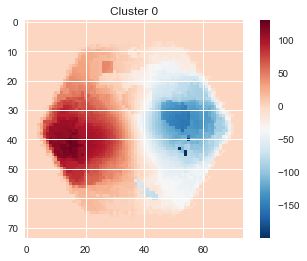

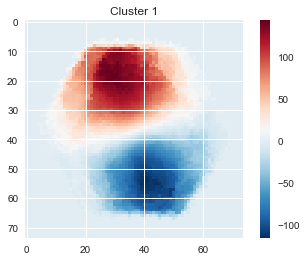

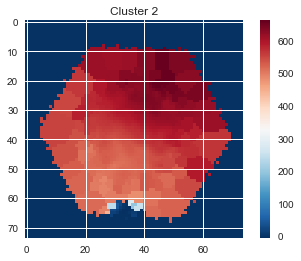

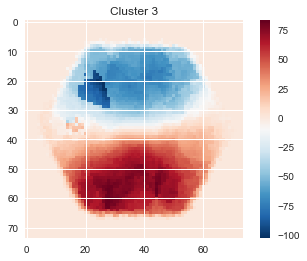

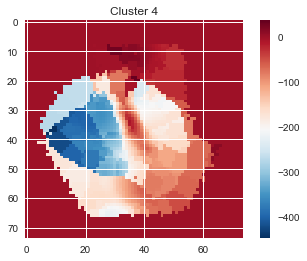

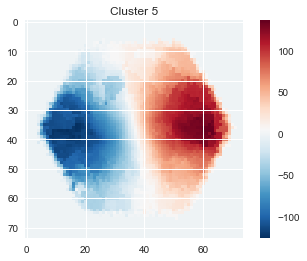

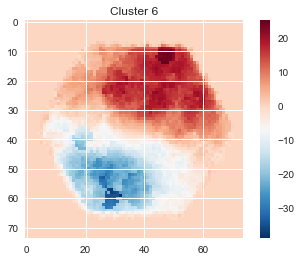

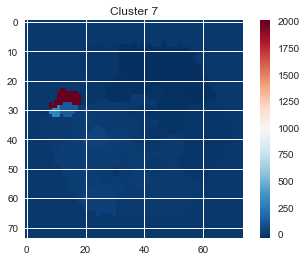

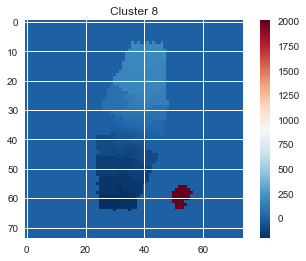

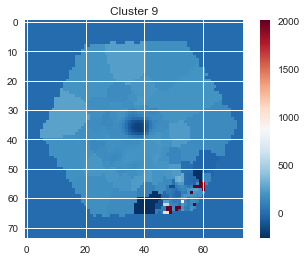

[3 1 6 6 6 3 6 5 3 6 0 0 6 6 1 1 4 0 6 0 1 6 6 6 3 6 6 5 4 1 3 6 6 6 6 1 6
 3 0 0 2 1 6 6 5 6 0 3 5 6 6 6 6 1 0 6 0 5 6 1 6 3 6 5 6 3 6 6 1 3 5 0 6 6
 5 1 6 1 0 6 3 6 6 3 3 6 5 6 1 6 3 6 3 6 6 0 0 1 1 6 1 3 3 1 0 6 3 6 0 3 6
 6 6 6 3 3 6 1 6 6 3 6 6 6 3 6 3 6 6 5 3 1 3 6 3 6 6 3 5 6 1 6 1 3 3 0 6 6
 8 6 6 1 3 9 0 6 3 6 7 6 5]


<Figure size 432x288 with 0 Axes>

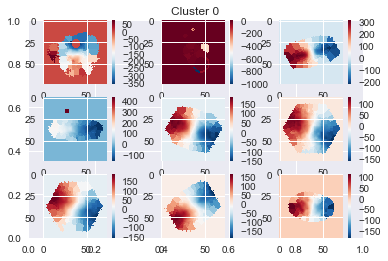

<Figure size 432x288 with 0 Axes>

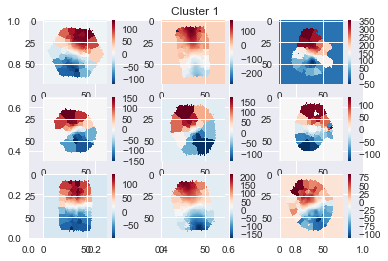

<Figure size 432x288 with 0 Axes>

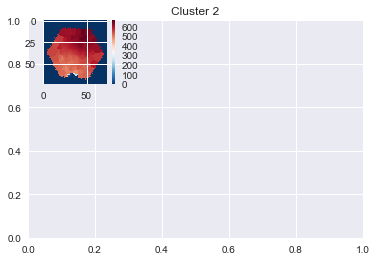

<Figure size 432x288 with 0 Axes>

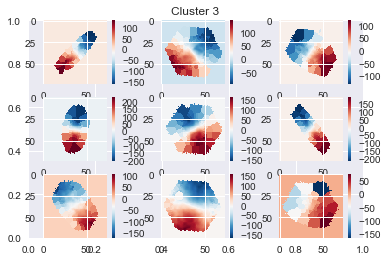

<Figure size 432x288 with 0 Axes>

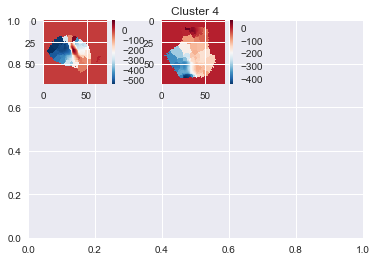

<Figure size 432x288 with 0 Axes>

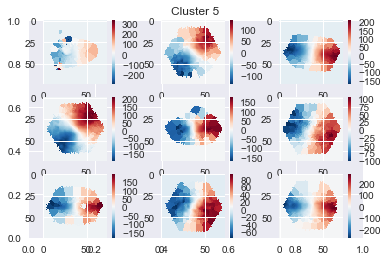

<Figure size 432x288 with 0 Axes>

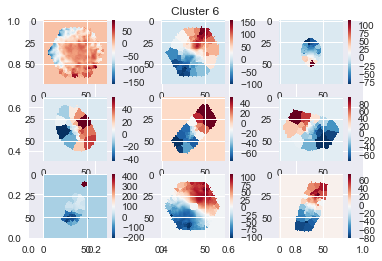

<Figure size 432x288 with 0 Axes>

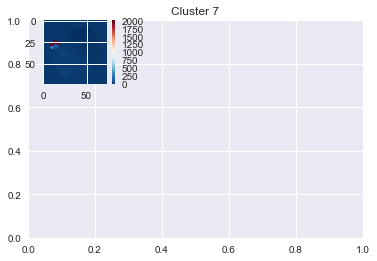

<Figure size 432x288 with 0 Axes>

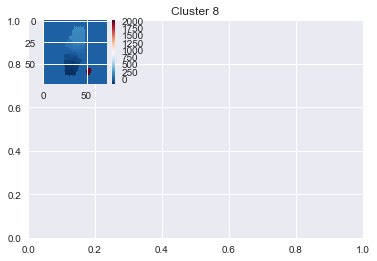

<Figure size 432x288 with 0 Axes>

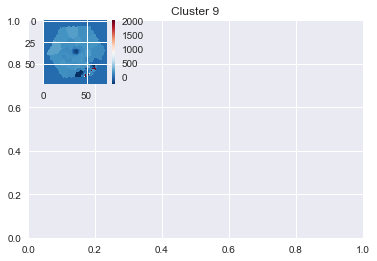

In [279]:
# Visualizing what the heck this actually looks like


print(shape)
centers = kmeans.cluster_centers_.reshape(nclusters, shape, shape)


for j in range(nclusters):
    plt.clf()
    plt.imshow(centers[j], cmap='RdBu_r')
    plt.colorbar()
    plt.title('Cluster '+str(j))
    plt.show()



# My next question is is there a way to visualize multiple maps within each class
print(clusters)
# these are the cluster IDs of each galaxy
cluster={}
#cluster_name=[]
for n in range(nclusters):
    
    cluster[n]=[]
    for j in range(data_length):
        if clusters[j]==n:
            cluster[n].append(np.reshape(map_array_ml[j,:],(shape,shape)))
    #cluster_name.append(str(cluster[n]))
nclusters_list = np.arange(0,nclusters)



# Plot multiple examples of each class
for i in range(nclusters):
    plt.clf()
    fig=plt.figure()
    #fig.subplots_adjust(hspace = .5, wspace=.001)
    plt.title('Cluster '+str(i))
    
    if np.shape(cluster[i])[0] < 9:
        for j in range(np.shape(cluster[i])[0]):
            ax = fig.add_subplot(3,3,j+1)
            im = ax.imshow(cluster[i][j], cmap='RdBu_r')
            plt.colorbar(im)
        plt.show()
    else:
        for j in range(9):
            ax = fig.add_subplot(3,3,j+1)
            im = ax.imshow(cluster[i][j], cmap='RdBu_r')
            plt.colorbar(im)
        plt.show()



(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


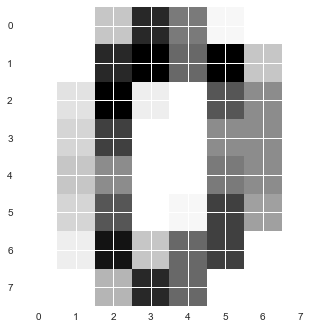

4 <class 'int'>
(4, 64)


TypeError: only size-1 arrays can be converted to Python scalars

In [180]:
#trying out k-means on the digits dataset
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
print(np.reshape(digits.data[0],(8,8)))
plt.imshow(np.reshape(digits.data[0],(8,8)))
plt.show()


clusters=4
print(clusters, type(int(clusters/2)))
kmeans = KMeans(n_clusters=clusters, random_state=0)
clusters = kmeans.fit_predict(digits.data)
print(kmeans.cluster_centers_.shape)

fig, ax = plt.subplots(2, int(clusters/2), figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(clusters, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
plt.show()

In [168]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
    
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)


0.7935447968836951

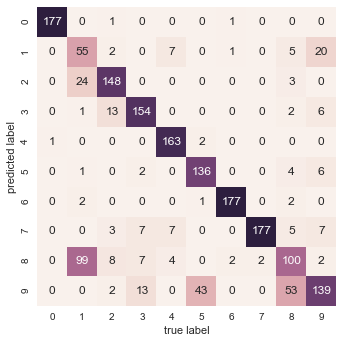

In [170]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set() 
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [171]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.11129660545353366